# Chapitre 4: Agents RAG - VéloCorp

Ce notebook vous permet d'**expérimenter** avec 2 types d'agents:

| Agent | Description | Usage |
|-------|-------------|-------|
| `SimpleAgent` | Appelle les outils puis répond | Questions simples, rapidité |
| `ReflectionAgent` | Répond, critique, améliore | Questions complexes, qualité |

**Fonctionnalités:**
- Visualisation du graphe de l'agent
- Personnalisation des prompts
- 3 niveaux de verbosité: `silent`, `normal`, `verbose`

## Setup

In [ ]:
# Installation du package
!pip install git+https://github.com/racousin/rag_attack.git -q

In [1]:
from rag_attack import (
    # Configuration
    set_config,
    # Agents
    SimpleAgent,
    ReflectionAgent,
    # Tools
    get_crm,
    get_erp,
    get_document_rag,
    get_internet_search,
    write_file,
    send_mail,
)

config = {
}
set_config(config)

# Liste des outils disponibles
all_tools = [get_document_rag, get_erp, get_crm, get_internet_search, write_file, send_mail]
print(f"6 outils disponibles: {[t.name for t in all_tools]}")

6 outils disponibles: ['get_document_rag', 'get_erp', 'get_crm', 'get_internet_search', 'write_file', 'send_mail']


---
# 1. SimpleAgent

L'agent le plus simple: il **décide** quel outil utiliser et génère une réponse.

```
Question → [Choix outil] → [Exécution] → Réponse
```

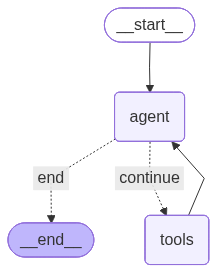

In [2]:
# Création d'un SimpleAgent
agent = SimpleAgent(
    config=config,
    tools=[get_document_rag, get_erp, get_crm, get_internet_search],
    max_iterations=5,
    verbose="normal"  # "silent", "normal", "verbose"
)

# Visualiser le graphe de l'agent
agent.display_graph()

### Test: Questions Documentation

In [3]:
# Questions sur la documentation
questions_docs = [
    "Quelle est la durée de garantie des vélos VéloCorp?",
    "Comment faire une réclamation sous garantie?",
    "Quels types de freins sont utilisés sur les vélos VéloCorp?",
]

question = questions_docs[0]
print(f"Question: {question}\n")
response = agent.invoke(question)
print(f"\nReponse:\n{response}")

Question: Quelle est la durée de garantie des vélos VéloCorp?


SimpleAgent
Question: Quelle est la durée de garantie des vélos VéloCorp?
  Tools: get_document_rag


Reponse:
La durée de garantie des vélos VéloCorp varie selon les modèles et les composants :

1. **Garantie générale** :
   - La garantie du cadre est de 2 ans.
   - Les composants sont garantis 1 an.

2. **Exemples spécifiques** :
   - **Sport-Pro** : Garantie de 36 mois.
   - **Pro-Location** : Garantie de 24 mois.
   - **Urbain-Sport** : Garantie de 12 mois.
   - **Pro-Livraison** : Garantie de 24 mois.

Pour des informations précises sur un modèle particulier, il est recommandé de consulter le manuel technique de ce modèle.


### Test: Questions Base de Données (ERP)

In [4]:
# Questions SQL/ERP
questions_sql = [
    "Quels sont les 3 vélos les plus chers en stock?",
    "Combien y a-t-il de clients B2B et B2C?",
    "Quels modèles ont moins de 50 unités en stock?",
]

question = questions_sql[0]
print(f"Question: {question}\n")
response = agent.invoke(question)
print(f"\nReponse:\n{response}")

Question: Quels sont les 3 vélos les plus chers en stock?


SimpleAgent
Question: Quels sont les 3 vélos les plus chers en stock?
  Tools: get_erp


/Users/raphaelcousin/rag_attack/rag_attack/tools/erp_tool.py:85: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)




Reponse:
Les 3 vélos les plus chers en stock sont :

1. **VéloCorp E-Sport** - 3188.83 €
2. **VéloCorp E-Cargo** - 2846.01 €
3. **VéloCorp Sport-Carbon** - 2786.09 €


### Test: Questions CRM

In [5]:
# Questions CRM
questions_crm = [
    "Combien y a-t-il de commerciaux dans l'équipe?",
    "Quelle est la valeur totale du pipeline d'opportunités?",
    "Quels sont les prospects avec un score supérieur à 70?",
]

question = questions_crm[0]
print(f"Question: {question}\n")
response = agent.invoke(question)
print(f"\nReponse:\n{response}")

Question: Combien y a-t-il de commerciaux dans l'équipe?


SimpleAgent
Question: Combien y a-t-il de commerciaux dans l'équipe?
  Tools: get_crm


Reponse:
L'équipe de commerciaux compte actuellement 6 membres actifs.


### Test: Questions Multi-Sources

L'agent peut utiliser **plusieurs outils** pour répondre à une question complexe.

In [6]:
# Questions nécessitant plusieurs outils
questions_multi = [
    "Donne le prix du E-City et ses caractéristiques techniques",
    "Quels modèles sont en rupture de stock et quelles sont leurs specs?",
]

question = questions_multi[0]
print(f"Question: {question}\n")
response = agent.invoke(question)
print(f"\nReponse:\n{response}")

Question: Donne le prix du E-City et ses caractéristiques techniques


SimpleAgent
Question: Donne le prix du E-City et ses caractéristiques techniques
  Tools: get_erp, get_document_rag


/Users/raphaelcousin/rag_attack/rag_attack/tools/erp_tool.py:85: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)




Reponse:
### Prix du E-City
Le VéloCorp E-City est au prix de **2468.46 €**.

### Caractéristiques techniques
Le E-City révolutionne votre mobilité avec sa technologie électrique avancée. Il est idéal pour les déplacements quotidiens en ville, offrant un excellent confort et une grande fiabilité. Voici quelques points clés :

- **Usage**: Déplacements quotidiens en ville
- **Confort**: Excellent
- **Fiabilité**: Grande
- **Distance typique**: Environ 10-15 km par trajet

Pour des informations plus détaillées sur les spécifications techniques, il serait utile de consulter le manuel utilisateur ou les documents techniques spécifiques du produit.


---
# 2. Génération de Rapports

L'agent peut créer des fichiers (texte, Excel) avec l'outil `write_file`.

In [7]:
# Agent avec capacité de génération de rapports
agent_writer = SimpleAgent(
    config=config,
    tools=[get_erp, get_crm, get_document_rag, write_file],
    max_iterations=5,
    verbose="normal"
)

In [8]:
# Générer un rapport
question = "Génère un rapport Excel des 5 produits les plus chers avec leur stock"
print(f"Question: {question}\n")
response = agent_writer.invoke(question)
print(f"\nReponse:\n{response}")

Question: Génère un rapport Excel des 5 produits les plus chers avec leur stock


SimpleAgent
Question: Génère un rapport Excel des 5 produits les plus chers avec leur stock
  Tools: get_erp


/Users/raphaelcousin/rag_attack/rag_attack/tools/erp_tool.py:85: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


  Tools: write_file


Reponse:
Le rapport Excel des 5 produits les plus chers avec leur stock a été généré avec succès. Vous pouvez le télécharger [ici](sandbox:/Users/raphaelcousin/rag_attack/Top_5_Produits_les_Plus_Chers.xlsx).


In [9]:
# Autres rapports possibles
rapports = [
    "Génère un rapport des produits en stock faible (< 50 unités)",
    "Crée un rapport du pipeline CRM avec les opportunités > 2000€",
]

question = rapports[0]
print(f"Question: {question}\n")
response = agent_writer.invoke(question)
print(f"\nReponse:\n{response}")

Question: Génère un rapport des produits en stock faible (< 50 unités)


SimpleAgent
Question: Génère un rapport des produits en stock faible (< 50 unités)
  Tools: get_erp


/Users/raphaelcousin/rag_attack/rag_attack/tools/erp_tool.py:85: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


  Tools: write_file


Reponse:
Le rapport des produits en stock faible a été généré avec succès. Vous pouvez le télécharger [ici](sandbox:/Users/raphaelcousin/rag_attack/Rapport_des_produits_en_stock_faible.xlsx).


---
# 3. Envoi d'Emails

L'agent peut envoyer des emails avec l'outil `send_mail`.

In [10]:
# Agent avec capacité d'envoi d'emails
agent_mailer = SimpleAgent(
    config=config,
    tools=[get_erp, get_crm, send_mail],
    max_iterations=5,
    verbose="normal"
)

# REMPLACEZ par votre email pour tester
MON_EMAIL = "votre.email@example.com"

In [11]:
# Décommentez pour envoyer un email de test
# question = f"Envoie un email à {MON_EMAIL} avec le résumé des 3 vélos les plus chers"
# response = agent_mailer.invoke(question)
# print(response)

In [12]:
# Exemples d'emails
print("Exemples d'emails à envoyer:")
print(f"  - Envoie un email à {MON_EMAIL} avec les produits en rupture de stock")
print(f"  - Envoie un email à {MON_EMAIL} récapitulant le pipeline CRM")

Exemples d'emails à envoyer:
  - Envoie un email à votre.email@example.com avec les produits en rupture de stock
  - Envoie un email à votre.email@example.com récapitulant le pipeline CRM


---
# 4. ReflectionAgent

Pattern plus avancé: l'agent génère une réponse, la **critique**, puis l'**améliore**.

```
Question → [Outils] → Réponse initiale → Critique → Réponse améliorée
```

Ce pattern produit des réponses de **meilleure qualité** pour les questions complexes.

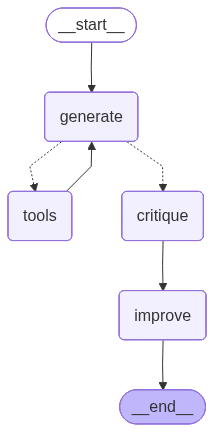

In [13]:
# Création d'un ReflectionAgent
reflection_agent = ReflectionAgent(
    config=config,
    tools=[get_erp, get_crm, get_document_rag],
    max_iterations=5,
    verbose="normal"
)

# Visualiser le graphe (plus complexe que SimpleAgent)
reflection_agent.display_graph()

In [14]:
# Test avec une question complexe
question = "Analyse la situation commerciale de VéloCorp: produits phares, stock, et pipeline"
print(f"Question: {question}\n")

response = reflection_agent.invoke(question)
print(f"\nReponse finale:\n{response}")

Question: Analyse la situation commerciale de VéloCorp: produits phares, stock, et pipeline


ReflectionAgent
Question: Analyse la situation commerciale de VéloCorp: produits phares, stock, et pipeline

  Phase 1: Initial Response
  Tools: get_erp, get_erp, get_crm


/Users/raphaelcousin/rag_attack/rag_attack/tools/erp_tool.py:85: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



  Critiquing response...
  Improving response...

  Phase 2: Critique

  Phase 3: Improvement


Reponse finale:
### Analyse de la situation commerciale de VéloCorp

#### Produits phares et stock

1. **Produits avec le plus de stock**:
   - **VéloCorp Sport-Elite**: 74 unités
   - **VéloCorp Pro-Livraison**: 71 unités
   - **VéloCorp Urbain-Classic**: 69 unités
   - **VéloCorp Urbain-Sport**: 59 unités
   - **VéloCorp E-Sport**: 49 unités

2. **Produits les plus chers**:
   - **VéloCorp E-Sport**: 3188.83 €
   - **VéloCorp E-Cargo**: 2846.01 €
   - **VéloCorp Sport-Carbon**: 2786.09 €
   - **VéloCorp E-City**: 2468.46 €
   - **VéloCorp Sport-Pro**: 2079.22 €

#### Pipeline commercial

1. **Performance des commerciaux**:
   - **Agathe-Émilie Auger**: 3 opportunités, 1 gagnée, taux de gain 33.3%, valeur totale 6592.85 €, région Bretagne.
   - **Alfred Gallet**: 11 opportunités, 2 gagnées, taux de gain 18.2%, valeur totale 5922.87 €, régions Bretagne et Nouvelle-Aquitaine.
   - **Alain Du

In [15]:
# Voir les détails de la dernière exécution
details = reflection_agent.get_last_run()
print("=== DÉTAILS DE LA RÉFLEXION ===\n")
print("1. Réponse initiale:")
print(details["initial_response"][:500] + "..." if details["initial_response"] else "N/A")
print("\n2. Critique:")
print(details["critique"][:500] + "..." if details["critique"] else "N/A")
print("\n3. Réponse améliorée:")
print(details["improved_response"][:500] + "..." if details["improved_response"] else "N/A")

=== DÉTAILS DE LA RÉFLEXION ===

1. Réponse initiale:
### Analyse de la situation commerciale de VéloCorp

#### Produits phares et stock

1. **Produits avec le plus de stock**:
   - **VéloCorp Sport-Elite**: 74 unités
   - **VéloCorp Pro-Livraison**: 71 unités
   - **VéloCorp Urbain-Classic**: 69 unités
   - **VéloCorp Urbain-Sport**: 59 unités
   - **VéloCorp E-Sport**: 49 unités

2. **Produits les plus chers**:
   - **VéloCorp E-Sport**: 3188.83 €
   - **VéloCorp E-Cargo**: 2846.01 €
   - **VéloCorp Sport-Carbon**: 2786.09 €
   - **VéloCorp E-Cit...

2. Critique:
### Critique de la réponse

#### Points forts

1. **Détail des produits phares et du stock**:
   - La réponse fournit une liste claire des produits avec le plus de stock, ce qui permet de comprendre quels modèles sont les plus disponibles.
   - Les produits les plus chers sont également bien identifiés, ce qui donne une idée des produits haut de gamme de VéloCorp.

2. **Performance des commerciaux**:
   - La performance des 

---
# 5. Personnalisation des Prompts

Vous pouvez **modifier les prompts** pour adapter le comportement de l'agent.

In [16]:
# Voir les prompts actuels
print("=== PROMPTS SIMPLEAGENT ===")
for name, prompt in agent.get_prompts().items():
    print(f"\n{name}:")
    print(f"  {prompt[:100]}...")

=== PROMPTS SIMPLEAGENT ===

system_prompt:
  Tu es un assistant intelligent qui utilise des outils pour répondre aux questions.
Utilise les outil...

tool_prompt:
  Sources disponibles:
- get_document_rag: Documentation, manuels, FAQs
- get_erp: Base SQL (produits,...


In [17]:
# Créer un agent avec un prompt personnalisé
custom_agent = SimpleAgent(
    config=config,
    tools=[get_document_rag, get_erp, get_crm],
    system_prompt="""Tu es l'assistant expert VéloCorp.
IMPORTANT: Réponds toujours avec des bullet points et cite tes sources.""",
    max_iterations=5,
    verbose="normal"
)

question = "Quels sont les vélos électriques disponibles?"
response = custom_agent.invoke(question)
print(response)


SimpleAgent
Question: Quels sont les vélos électriques disponibles?
  Tools: get_erp


/Users/raphaelcousin/rag_attack/rag_attack/tools/erp_tool.py:85: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



Il semble qu'il n'y ait actuellement aucun vélo électrique disponible dans notre base de données.


In [ ]:
# Banque de questions à tester
questions = {
    "Documentation": [
        "Quelle est la procédure de garantie?",
        "Comment entretenir la batterie d'un vélo électrique?",
    ],
    "ERP/SQL": [
        "Top 5 des produits par prix",
        "Clients avec plus de 5000€ de dépenses",
    ],
    "CRM": [
        "Opportunités > 5000€",
        "Performance des commerciaux",
    ],
    "Multi-sources": [
        "Analyse complète du E-City: prix, specs, opportunités",
        "Produits à risque: stock faible + forte demande",
    ],
}

print("Questions disponibles:")
for cat, qs in questions.items():
    print(f"\n{cat}:")
    for q in qs:
        print(f"  - {q}")

---
# 6. Comparaison SimpleAgent vs ReflectionAgent

In [18]:
import time

# Agents en mode silencieux pour la comparaison
simple = SimpleAgent(config=config, tools=[get_erp, get_crm], max_iterations=5, verbose="silent")
reflect = ReflectionAgent(config=config, tools=[get_erp, get_crm], max_iterations=5, verbose="silent")

question = "Analyse des ventes: top produits et opportunités en cours"
print(f"Question: {question}\n")

# SimpleAgent
start = time.time()
r1 = simple.invoke(question)
t1 = time.time() - start
print(f"=== SIMPLEAGENT ({t1:.1f}s) ===")
print(r1[:400] + "...\n")

# ReflectionAgent
start = time.time()
r2 = reflect.invoke(question)
t2 = time.time() - start
print(f"=== REFLECTIONAGENT ({t2:.1f}s) ===")
print(r2[:400] + "...")

print(f"\nDifférence de temps: +{t2-t1:.1f}s pour la réflexion")

Question: Analyse des ventes: top produits et opportunités en cours



/Users/raphaelcousin/rag_attack/rag_attack/tools/erp_tool.py:85: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


=== SIMPLEAGENT (16.0s) ===
### Analyse des Ventes

#### Top Produits
Il semble qu'il n'y ait pas de données disponibles pour les produits les plus vendus.

#### Opportunités en Cours
Voici les opportunités en cours de négociation :

1. **Michel Guichard - Urbain-Sport, E-City**
   - **Description**: Opportunité B2C - Michel Guichard recherche Urbain-Sport, E-City pour usage personnel.
   - **Valeur estimée**: 4026.96 €
   -...



/Users/raphaelcousin/rag_attack/rag_attack/tools/erp_tool.py:85: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


=== REFLECTIONAGENT (42.0s) ===
### Analyse des Ventes

#### Top Produits
Actuellement, les données sur les produits les plus vendus ne sont pas disponibles. Il serait bénéfique de mener une analyse approfondie pour identifier les produits qui génèrent le plus de revenus et ceux qui ont le plus fort potentiel de croissance. Cela permettrait de mieux orienter les stratégies de vente et de marketing.

#### Opportunités en Cours
Vo...

Différence de temps: +26.0s pour la réflexion
